### Random Linear Classifier
https://www.youtube.com/watch?v=3RenNnMJdUM&list=PLPTV0NXA_ZSi-nLQ4XV2Mds8Z7bihK68L&index=9&t=3352s

Try 'k' random choices for theta0, theta1 and theta2. 
<br>
Calculate the training error for each and choose the one with least value.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
#Dog data
dogs_whisker_length = np.random.normal(loc=5,scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1, size=10)

In [5]:
#Cat data
cat_whisker_length = np.random.normal(loc=8,scale=1, size=10)
cat_ear_flappiness_index = np.random.normal(loc=5,scale=1, size=10)

In [6]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [7]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [8]:
cat_ear_flappiness_index

array([5.15494743, 5.37816252, 4.11221425, 3.01920353, 4.65208785,
       5.15634897, 6.23029068, 6.20237985, 4.61267318, 4.69769725])

In [9]:
cat_whisker_length

array([ 5.44701018,  8.6536186 ,  8.8644362 ,  7.25783498, 10.26975462,
        6.54563433,  8.04575852,  7.81281615,  9.53277921,  9.46935877])

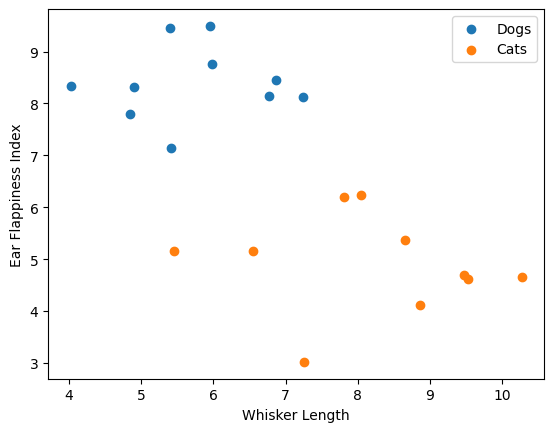

In [10]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label="Dogs")
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label="Cats")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.legend()
plt.show()


In [38]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error



def random_linear_classifier(data_dogs, data_cats, k, d):
    '''
    k = # of random values to try
    d = No of features
    '''
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    errors = []

    for i in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)
        errors.append(error)
        if error < best_error:
            print(f"Found new best error at iteration : {i}")
            print(f"Current best error : {best_error}")
            print(f"New best error : {error}")
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, errors

In [34]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cat_data = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T

In [42]:
# No of iterations
k = 100

# No of features
d = 2 

best_theta, best_theta0, errors = random_linear_classifier(dogs_data, cat_data, k, d)

Found new best error at iteration : 0
Current best error : inf
New best error : 16
Found new best error at iteration : 1
Current best error : 16
New best error : 11
Found new best error at iteration : 2
Current best error : 11
New best error : 10
Found new best error at iteration : 12
Current best error : 10
New best error : 1
Found new best error at iteration : 14
Current best error : 1
New best error : 0


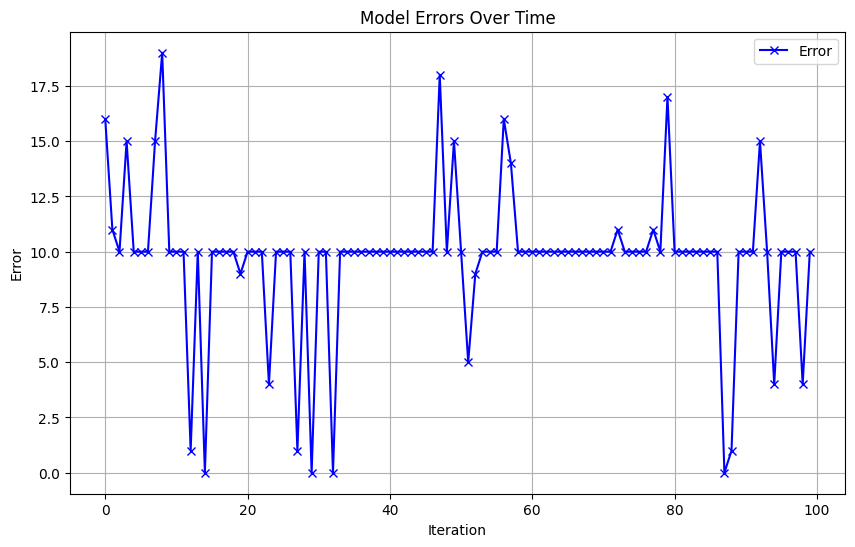

In [47]:
import matplotlib.pyplot as plt


# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(errors, marker='x', linestyle='-', color='b', label='Error')
plt.title('Model Errors Over Time')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
print(f"Best theta : {best_theta}")
print(f"best_theta0 : {best_theta0}")

Best theta : [-0.7097851   0.70464272]
best_theta0 : 0.1555907349688975


In [52]:
x_vals = np.linspace(2,10,100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0/best_theta[1])

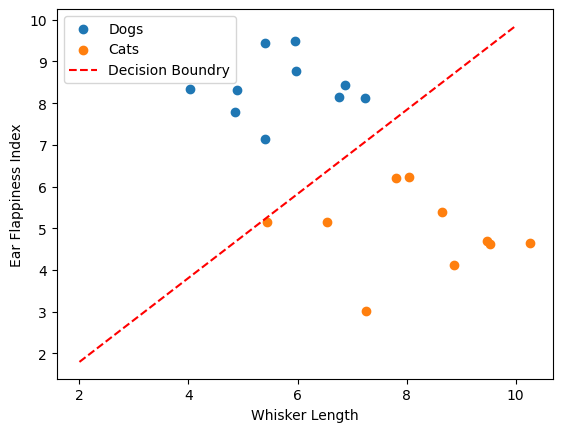

In [55]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label="Dogs")
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label="Cats")
plt.plot(x_vals, y_vals, color="red", linestyle="--",label="Decision Boundry")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.legend()
plt.show()


### Using a test set

In [56]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [57]:
np.random.seed(0)

In [58]:
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [59]:
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [60]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [62]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

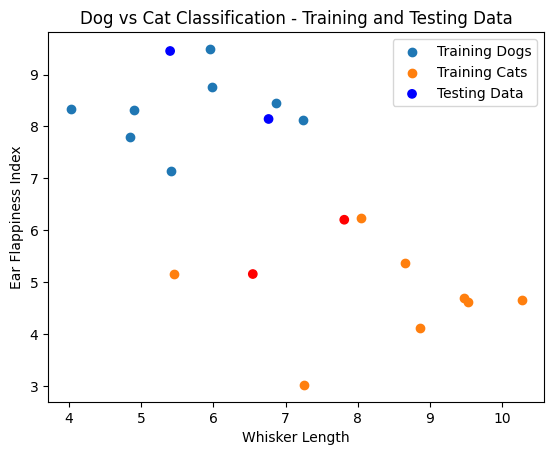

In [67]:
# Plot the training and testing data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Training Cats')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='Testing Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Training and Testing Data')
plt.legend()
plt.show()

In [68]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error



def random_linear_classifier(data_dogs, data_cats, k, d):
    '''
    k = # of random values to try
    d = No of features
    '''
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    errors = []

    for i in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)
        errors.append(error)
        if error < best_error:
            print(f"Found new best error at iteration : {i}")
            print(f"Current best error : {best_error}")
            print(f"New best error : {error}")
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, errors

In [69]:
# No of iterations
k = 100

# No of features
d = 2 

best_theta, best_theta0, errors = random_linear_classifier(dogs_data, cat_data, k, d)

Found new best error at iteration : 0
Current best error : inf
New best error : 10
Found new best error at iteration : 16
Current best error : 10
New best error : 0


In [72]:
x_vals = np.linspace(2,10,100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0/best_theta[1])

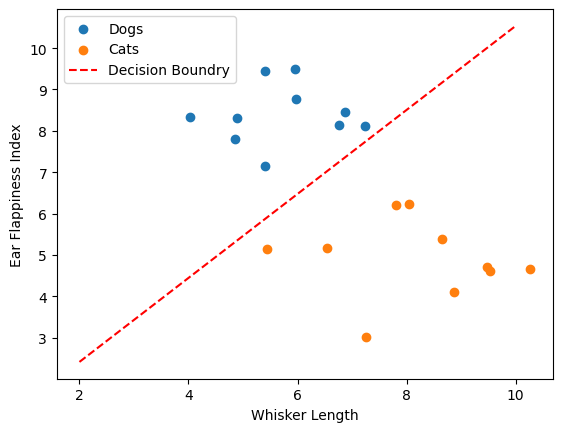

In [73]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label="Dogs")
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label="Cats")
plt.plot(x_vals, y_vals, color="red", linestyle="--",label="Decision Boundry")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.legend()
plt.show()


In [74]:
test_error = compute_error(X_test[y_test==0], X_test[y_test==1], best_theta, best_theta0)
print(f"Test error : {test_error}")

Test error : 0


In [ ]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label="Dogs")
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label="Cats")
plt.plot(x_vals, y_vals, color="red", linestyle="--",label="Decision Boundry")
plt.xlabel("Whisker Length")
plt.ylabel("Ear Flappiness Index")
plt.legend()
plt.show()


f